#### Part :1 (fiter method used to get the unique features)

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [4]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
data = pd.read_csv('santander-train.csv',nrows=2000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
x = data.drop( labels='TARGET',axis=1)
y = data['TARGET']

x.shape,y.shape

((2000, 370), (2000,))

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =.80,random_state=0,stratify=y)

x_train.shape,x_test.shape

((1600, 370), (400, 370))

Remove constant,quaisi and duplicate

In [8]:
#remove constant and quaisi constant

In [9]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(x_train)
x_train_filter = constant_filter.transform(x_train)
x_test_filter  = constant_filter.transform(x_test)

x_train_filter.shape,x_test_filter.shape

((1600, 223), (400, 223))

In [10]:
#Duplicate feature removal

In [11]:
x_train_T = x_train_filter.T
x_test_T  = x_test_filter.T

x_train_T = pd.DataFrame(x_train_T)
x_test_T  = pd.DataFrame(x_test_T)

duplicate_features = x_train_T.duplicated()
keep_them = [not index for index in duplicate_features]

x_train_unique = x_train_T[keep_them].T
x_test_unique  = x_test_T[keep_them].T

x_train_unique.shape,x_test_unique.shape

((1600, 200), (400, 200))

In [12]:
%%time
def randomforest(x_train,x_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=0)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy : ',accuracy_score(y_test,y_pred))
randomforest(x_train_unique,x_test_unique,y_train,y_test)

Accuracy :  0.955
Wall time: 11.2 s


In [13]:
%%time
randomforest(x_train,x_test,y_train,y_test)

Accuracy :  0.955
Wall time: 12.5 s


However we got neccessary model with the acuracy of 95 %

#### Part :2(by using the corelation coeficient remove the corrrelated features)

### Feature Selection with Filtering Method -Correlated Feature Removal

In that we are going to remove the feature those who are co-related by cartain coeficient or point.

If the correlation coeficient is more than 0.85 or less than -0.85 in that case features are highly correlated and this fetures might not give us the extra information to make the final prediction of classifition so we remove those features and by doing this ultimately improve our model and it will take less time train our model.

 A dataset can be correlated features.Two or more than two features are correlated if they are close to each other in the linear space.

Correlation between the output observations and input features is very important and such features should be retained.

Our aim is to rreduce the correlative function and reduce diamensionality of the overall feature space.

Because our model gives us the better performace for the perticalar position at time performace of classifier high.
But after the some time as soon as diamensinality of the feature space is increse that time modle start to decreasing its performace.


So,that is always recomanded or desirable that we should have select optimal number of features.

In the feature space there are lots of the features are avalible that can predicted themself we use one of them at one time.So,this kind of feature not giveing any information for prediction of the model so that is why its very necessary to remove this kind features.Those feature also called as co-linear feature.


Co-lineraity in the feature space and output is always desirable but the co-linearity amongs the features space space  is not desirable.

#### Summary:-

Feature Space to target coeficient is desired.

Feature to feature is not desurable.

If two features are highly correlated then either features is redudant (either we have to remove feature 1 or feature 2)

Correlation is feature space increases the model complexity.

Removing Correlated features improve the model performance.

Different model shows the different performance over the correlated features.

Before the work on the correlation feature we need to think about the previous part -1 there we have got the  x_train_unique,x_test_unique.
Afterwards we have to think about the correlation feature.First we will calculate peierson correlation coefficient for traing and testing datasets and then we will select only those features which have correlation less than 0.85.

In [14]:
#first we are going to use the correlation matrix by using corrmat

In [15]:
cormat = x_train_unique.corr()

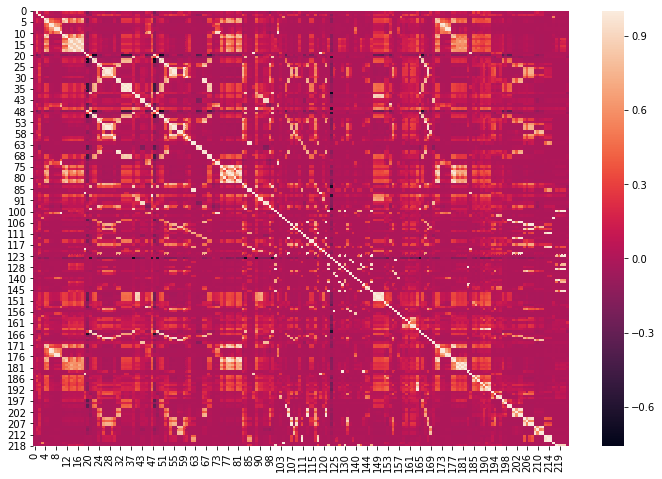

In [16]:
plt.figure(figsize = (12,8) )
sns.heatmap(cormat)

Here if see the black and white splot there which the features are interseting those are the features are very highly correlated. 

White is positive correlation and black represent the negetive correlation.

If we observed that the black is below -.85% and white is above the +85%.

In [17]:
#we are using the python method to get the corrlation features
#here we are defining function that is correlation with attributes are data,threshold
#data = x_train_unique to reduce the chances of overfitting
#threshold is the limit upto which we count as no correlative faeture but above which is counted as correlative features.
#thresold means gives the limit after which we discard the features.
def correlation(data,threshold):
    
#there could be the possibility of the same features occurance on multiple time.
#here we are using set with the corr_col the set method is avoid to use the same feature multipletime.

    corr_col = set()
#then we use the cormat which is presenting the correlation between the features of the data which we will procced.
    cormat = data.corr()
#so,after we use the for loop for the range(len(cormat.columns))
#That means it is iterating features from features range it will start from 0 to final number from 0 to final feature that 219 featues 
#range(0,219)
    for i in range(len(cormat.columns)):
#by using above its possible to get the sitiation range(1,1),range(2,2) to avoid that kind of situation
#if we use the range in that we containg the same features that time the correlation will become 1 because we are using same feature
#that kind of correlation we not to consider.
        for j in range(i):
#after we we mention condition whever we i and j values in cormat like when the i is 1 that time j will be 0 and when i become 2 that
#time j is will be the 1 and also it take care if we taken the 0 and 1 then it will not repeat the same iteration as (0,1) and (1,0)


#we mention the condition when the abs(absolute values) of the cormat.iloc(ilocation)[i,j] will be greater than threshold 

            if abs(cormat.iloc[i,j])>threshold:
#that time,what feature will above the threshold they will add in corr_col and it will add those features which are grater than the threshold.
                colname = cormat.columns[i]
#above list is will contain the feature which are availbe in correlation format and it will gone add to the corr_col which set to get.
                corr_col.add(colname)
    return corr_col                

In [18]:
def correlation(data,threshold):
    corr_col = set()
    cormat = data.corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i,j]) > threshold:
                colname = cormat.columns[i]
                corr_col.add(colname)
    return corr_col

In [19]:
correlated_features = correlation(x_train_unique,0.85)

correlated_features

{5,
 7,
 9,
 11,
 12,
 14,
 16,
 17,
 18,
 23,
 27,
 28,
 29,
 32,
 34,
 35,
 37,
 39,
 41,
 44,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 58,
 59,
 60,
 63,
 65,
 66,
 67,
 68,
 70,
 73,
 74,
 78,
 79,
 80,
 81,
 82,
 84,
 85,
 86,
 87,
 89,
 91,
 93,
 96,
 99,
 102,
 108,
 109,
 113,
 115,
 118,
 119,
 122,
 123,
 127,
 130,
 138,
 139,
 142,
 143,
 145,
 147,
 148,
 149,
 150,
 151,
 154,
 156,
 157,
 163,
 165,
 166,
 167,
 168,
 169,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 180,
 181,
 182,
 183,
 184,
 187,
 189,
 191,
 192,
 196,
 199,
 200,
 201,
 203,
 204,
 205,
 206,
 207,
 208,
 211,
 212,
 213,
 214,
 215,
 216,
 218,
 219,
 220,
 221}

In [20]:
len(correlated_features)

121

We have got the correlated feature then our next task to remove this features and then strat to train model.

In [21]:
x_train_uncorr = x_train_unique.drop(labels=correlated_features,axis=1)
x_test_uncorr  = x_test_unique.drop(labels=correlated_features,axis=1)

In [22]:
x_train_uncorr.shape,x_test_uncorr.shape

((1600, 79), (400, 79))

In [26]:
%%time
randomforest(x_train_uncorr,x_test_uncorr,y_train,y_test)

Accuracy :  0.9575
Wall time: 9.75 s


In [24]:
%%time 
randomforest(x_train,x_test,y_train,y_test)

Accuracy :  0.955
Wall time: 10.9 s


In [28]:
(10.9-9.75)*100/9.75

#It shows that the 11 % time gain into our training time by removing the correlative features.

11.794871794871797

From the above we can only say that the it does not making any on the accuracy but it impacting on the training time which is equired less than the original datasets.

Here we use the broot force techinique to reduce the diamensionality of the datasets by removing the correlated featutres.

Till now we can make any statement that visit our accuracy doesn't improve pretty much are very high but the training time has reduced the effect source around 11% of the training time has been reduced to increase if you are doing a very big data set in that place where you can remove uncorrelated features and unnecessarily features and you can reduce dimensions of your data and you can handle curse of dimension what we did we actually we did kind of the brute force that we had removed all the correlated features but you know this is not always recommended there could be a places where some group of features are correlated with each others only that mean we only need to remove a certain features and we can keep some features bye testing the features importance.for example it's a year in out of 121 features there would be kind of the 10 groups where they are correlated that we can avoid these all the correlated features in kind of the groups and then finally we can select a single feature in each of those groups after performing feature importance so here now we are going to do what feature importance and the grouping of these correlated features.

### Feature Grouping and Feature Important.

In [40]:
cormat

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,218,219,220,221,222
0,1.000000,-0.027387,-0.006389,0.035624,0.031820,0.014071,0.022963,0.023790,0.031051,0.028532,...,0.007409,-0.017482,-0.015821,-0.016693,-0.002554,-0.040836,-0.030185,-0.043733,-0.043562,-0.011098
1,-0.027387,1.000000,0.129309,-0.003721,0.162310,0.183237,0.026635,0.027339,-0.002888,-0.002831,...,0.093521,-0.002286,-0.002963,-0.002895,-0.002054,-0.002733,-0.002054,-0.002894,-0.002879,-0.006643
2,-0.006389,0.129309,1.000000,0.039272,0.094338,0.098071,0.041147,0.033639,0.020170,0.018505,...,0.122776,-0.021590,-0.026059,-0.024925,0.042111,0.009685,0.001744,0.015735,0.016210,-0.006950
3,0.035624,-0.003721,0.039272,1.000000,0.084736,0.044504,-0.004283,-0.003979,-0.003148,-0.003086,...,-0.006308,-0.002492,-0.003230,-0.003156,0.557516,-0.002979,-0.002239,-0.003155,-0.003139,-0.026085
4,0.031820,0.162310,0.094338,0.084736,1.000000,0.871544,0.388872,0.368375,0.242827,0.216412,...,-0.014652,-0.005787,-0.007501,-0.007330,0.040981,-0.006920,-0.005200,-0.007327,-0.007290,-0.013012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,-0.040836,-0.002733,0.009685,-0.002979,-0.006920,0.004181,-0.001592,-0.001479,-0.001170,-0.001147,...,-0.002345,-0.000926,-0.001201,-0.001173,-0.000832,1.000000,0.904901,0.906773,0.886792,-0.000578
219,-0.030185,-0.002054,0.001744,-0.002239,-0.005200,0.006882,-0.001196,-0.001111,-0.000879,-0.000862,...,-0.001762,-0.000696,-0.000902,-0.000882,-0.000625,0.904901,1.000000,0.641089,0.605750,-0.000434
220,-0.043733,-0.002894,0.015735,-0.003155,-0.007327,0.000722,-0.001686,-0.001566,-0.001239,-0.001215,...,-0.002483,-0.000981,-0.001271,-0.001242,-0.000881,0.906773,0.641089,1.000000,0.998978,-0.000612
221,-0.043562,-0.002879,0.016210,-0.003139,-0.007290,0.000344,-0.001677,-0.001558,-0.001233,-0.001208,...,-0.002470,-0.000976,-0.001265,-0.001236,-0.000877,0.886792,0.605750,0.998978,1.000000,-0.000609


In [41]:
#lets do the the verically stacking (make the 0th row into the form oth column)

In [42]:
corrdata = cormat.abs().stack()
corrdata

0    0      1.000000
     1      0.027387
     2      0.006389
     3      0.035624
     4      0.031820
              ...   
222  218    0.000578
     219    0.000434
     220    0.000612
     221    0.000609
     222    1.000000
Length: 40000, dtype: float64

In [43]:
#sort the values of the stack formate of the corrdata
corrdata = corrdata.sort_values(ascending=False)
corrdata
#it is the form of desending order format due to this reason lowest values come first and highest at last.

142  127    1.000000e+00
127  142    1.000000e+00
139  126    1.000000e+00
126  139    1.000000e+00
125  156    1.000000e+00
                ...     
45   24     1.269902e-16
24   51     3.905293e-17
51   24     3.905293e-17
23   52     3.862636e-17
52   23     3.862636e-17
Length: 40000, dtype: float64

If we see the above sorted corrdata in that we get to know that the 142 is correlated with 127 similarly 127 is correlated with the 142
and in similar fashion 139 is correlated with the 126 

After the some time we will get the correlation with the same features space like 166 is correlated with the 166 an so on.We will not gone filter out this correlated otherwise will get the at least one correlation for each feature.we remove this kind ,I means we keep this like 166 will correlated other than the same feature i.e.166


Now,for that we are going to do grouping lets say if feature space is 142 so what are other features for which this feature 142  is correlated.

We can do that by selecting the features inbetween o.85 and 1.

In [44]:
corrdata = corrdata[corrdata>0.85]
corrdata = corrdata[corrdata<1]

corrdata

22   50     1.000000
50   22     1.000000
67   32     1.000000
32   67     1.000000
216  104    1.000000
              ...   
108  58     0.852894
99   165    0.852609
165  99     0.852609
5    172    0.850782
172  5      0.850782
Length: 526, dtype: float64

It is representing the data in such manner that 22 is correlated with the 50 and 50 then correlated 22 it is showing that correlation is equal to 1 but 
but this is not exacly 1 due to the limitation of the digital thats is why it is showing 1 but it is somehow nearby 1.Since we had
remove all features with are correlated equal to 1.Other than same features there is no features which is correlated.why ?

If the correlation is exctly 1 other than the same feature that means those features are duplicate and we already remove those
duplicate features.

Now just go ahead and perform the grouping.

For that we need to covert into the pandas DataFrame.

reset_index() function to reset the index of the given DataFrame object.
andas reset_index() is a method to reset index of a Data Frame. reset_index() method sets a list of integer ranging from 0 to length of data as index.





In [45]:
#before going to that 
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['features1','features2','corr_value']
corrdata

,features1,features2,corr_value
0,22,50,1.000000
1,50,22,1.000000
2,67,32,1.000000
3,32,67,1.000000
4,216,104,1.000000
...,...,...,...
521,108,58,0.852894
522,99,165,0.852609
523,165,99,0.852609
524,5,172,0.850782


we got the nice visualization and we will go for the grouping.

In [47]:
#we had created empty list by the name groupped_feature_list 
#Similarly, we had created the empty list by the name correlated_grouped_list
#first we are going to create the group of the feature and then we are going to create the list of those features group.
#Then we will find the feature importance of each group then we wil select only one feature from each group then we wil discard the other features.

grouped_feature_list =[]
correlated_grouped_list = []
for feature in corrdata.features1.unique():
#that means it is going to see if this  feature is not present into a grouped_feature_list then we shold consider this feature.
#otherwise,grouping already done and dont we need to do grouping.
#so,lets find out all correlated feature in group 
    if feature not in grouped_feature_list:
#when the feature from the group is become equal to the corrdata.features1 feature then only it will be accept in the correlated_block object or variable.
        correlated_block = corrdata[corrdata.features1==feature]
#we going to do if the two features are same that means they are same correlated group then we are going to getthe feature2 of that correlated_block 

#If we have here the feature 22 so it going to get the all features in feature1 then it will look all the feature set against 22
#That those features are fall into the same group 
#Since 22 is correlated with 50 the any feature correlated with 50 will be also highly correlatated with 22 .
#so, in this way we are going the get the same correlation ith 22 and similar kind of the features.
        grouped_feature_list= grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
#by doing so, we have created the list of grouped features.
        correlated_grouped_list.append(correlated_block)

In [81]:
grouped_feature_list =[]
correlated_grouped_list = []
for feature in corrdata.features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.features1==feature]
        grouped_feature_list= grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
        correlated_grouped_list.append(correlated_block)

In [49]:
len(correlated_grouped_list)
#In 121 correlated faeture  we had found the 54 groups that there is 54 group exisied in out of those correlated features.

54

In [ ]:
#After in correlated group  that we are going to get a single feature based on the feature importance of toatl features.

In [50]:
#toltal feature 
x_train.shape

(1600, 370)

In [51]:
#uncorr_feature
x_train_uncorr.shape

(1600, 79)

We had removed the all the constant,quaisi constant,duplicate and correlated_features then we having the remaing feature those are only 79.

In [52]:
#if we want to see the group in that we can by the below way
for group in correlated_grouped_list:
    print(group)

     features1  features2  corr_value
0           22         50    1.000000
439         22         23    0.880913
443         22         51    0.880913
     features1  features2  corr_value
2           67         32    1.000000
266         67         31    0.932090
273         67         66    0.932090
513         67         25    0.854618
515         67         53    0.854618
   features1  features2  corr_value
4        216        104         1.0
     features1  features2  corr_value
6           55         27    1.000000
89          55         28    0.984542
94          55         56    0.984542
146         55        168    0.971592
340         55         26    0.906471
412         55         29    0.889905
464         55         59    0.872808
501         55         54    0.858043
    features1  features2  corr_value
12         80         76    0.999639
     features1  features2  corr_value
14         182        180    0.999309
411        182        181    0.891920
420        182    

But here,We are now going to put 54 more features so that from  each group.

### Feature importance based on tress based classifiers.

So, We are going to do a feature important based on the tree based classifier.

In [61]:
#first we had created the empty list for important features.
important_features = []

#then we go group by group and from the correlated_grouped_list
#In each group we are calculating here most important feature which is located at 0 i.e feat = importance.iloc[0]
#Because we had sorted in the desecending order i.e.    importance.sort_values(by = 'importance', ascending = False,inplace = True )
#Once we got the most important feature from each group then we make here list of the most important features for each group.
#now we got feature list that we can print by calling important_features.

#then we go group by group 
for group in correlated_grouped_list:
    
 
#In each group  having the unique feature if we observed that unique features from group and feature1 couluns similarly for the feature2 column
#we added them given the name that variable as features i.e. common for all with combine unique features from each group.
                                                     
    features = list(group.features1.unique()) + list(group.features2.unique())

#Afterwards use the Randomforestclassifier 

                                                     
    rf = RandomForestClassifier(n_estimators=1000,random_state=0)
    
#fit the model on the data x_train_unique[features],y_train
#here,x_train_unique[features] is noting but x_train_unique is the  data with inclusion of the unique feature avalile in each group. .

    rf.fit(x_train_unique[features],y_train) 

#to get imporatnce feature we have to concatenate two kind of series.
#First is filled with the combine unique features of eah group.
#Second Series of the dataframe which is filled with the whhichever feature the randomforest classifier gives us those important features avalible in that.

#rf.feature_importances_ gives us the imporatnt features 
#features only giving  unique features of avalible in group.

    
    importance = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis =1)
    
#create the two columns for the importance 
#first = feature(it only providing the unique features avalible ) 
#second = importance(it providing the imporatnt feature in each group)

    importance.columns = ['features','importance'] 
    
#sort the value of the importance in ascending format so higher values come first with the starting of imporatance.

    importance.sort_values(by = 'importance', ascending = False,inplace = True )
    
#start to get the lower values from the position zeroth ith location of the imporatnce column.

    feat = importance.iloc[0]
#then lastly it added the imporance which having two columns feature and importance data in sorted manner .
    important_features.append(feat)

In [62]:
important_features

[features      23.000000
 importance     0.290988
 Name: 2, dtype: float64, features      25.000000
 importance     0.322323
 Name: 4, dtype: float64, features      104.000000
 importance      0.522979
 Name: 1, dtype: float64, features      168.000000
 importance      0.384278
 Name: 4, dtype: float64, features      80.000000
 importance     0.506065
 Name: 0, dtype: float64, features      180.000000
 importance      0.437209
 Name: 1, dtype: float64, features      147.000000
 importance      0.160047
 Name: 5, dtype: float64, features      14.000000
 importance     0.360843
 Name: 0, dtype: float64, features      82.000000
 importance     0.186798
 Name: 3, dtype: float64, features      192.000000
 importance      0.359525
 Name: 0, dtype: float64, features      114.000000
 importance      0.523164
 Name: 1, dtype: float64, features      109.000000
 importance      0.270426
 Name: 3, dtype: float64, features      165.000000
 importance      0.476715
 Name: 2, dtype: float64, features

In [64]:
#now make the DataFrame of important_features
important_features = pd.DataFrame(important_features)
important_features.reset_index(inplace = True,drop = True)
important_features

,features,importance
0,23.0,0.290988
1,25.0,0.322323
2,104.0,0.522979
3,168.0,0.384278
4,80.0,0.506065
5,180.0,0.437209
6,147.0,0.160047
7,14.0,0.360843
8,82.0,0.186798
9,192.0,0.359525


We had already to know that we had 54 group then we can see here also 0 to 53 that means 54.

In [69]:
#feature are to be consider means important features : features selected from the important_feature

features_to_consider = set(important_features['features'])

#feature which are to be discared it means the correlated_features and feature that was accpted due to high important.

features_discarded   = set(correlated_features)  - set(features_to_consider)

#make list of features which are discarded.

features_discarded = list(features_discarded)


Now we have to take a new datasets because we had discared correlated features and keeping the atleat the one features from one group.

We had taken the new datasets in that we pass the x_train_unique,x_test_unique data with drop of the feature which are discareded.

In [71]:
x_train_grouped_uncorr = x_train_unique.drop(labels= features_discarded,axis =1)

x_train_grouped_uncorr.shape

(1600, 110)

In [75]:
x_test_grouped_uncorr = x_test_unique.drop(labels= features_discarded,axis=1)

x_test_grouped_uncorr.shape

(400, 110)

We had taken the imporant features from each group then we use these features to get the accuracy.

In [74]:
%%time 
randomforest(x_train_grouped_uncorr,x_test_grouped_uncorr,y_train,y_test)

Accuracy :  0.955
Wall time: 9.79 s


Lets check the same accuracy and computing time with the original dataset for the comparision.

In [76]:
%%time
randomforest(x_train,x_test,y_train,y_test)

Accuracy :  0.955
Wall time: 10.7 s


In [78]:
%%time
randomforest(x_train_uncorr,x_test_uncorr,y_train,y_test)

Accuracy :  0.9575
Wall time: 9.68 s


Time GAIN is 9% Decrease.

In [79]:
(10.7-9.79)*100/9.79

9.295199182839635